In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [68]:
results_path = pathlib.Path('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results')
files = list(results_path.glob('*bestPareto.nc'))
nc_list = []
for file in files:
    if not file.name.startswith('test8k'):
        continue
    # else:
    #     pass
    print(file.name)
    nc_list.append(file)

test8kMC_20250822_bestPareto.nc
test8kMC_20250826_bestPareto.nc
test8kMC_20250825_bestPareto.nc
test8kMC_20250828_bestPareto.nc
test8kMC_20250829_bestPareto.nc
test8kMC_20250824_bestPareto.nc
test8kMC_20250827_bestPareto.nc
test8kMC_20250823_bestPareto.nc


In [69]:
nc_list

[PosixPath('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results/test8kMC_20250822_bestPareto.nc'),
 PosixPath('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results/test8kMC_20250826_bestPareto.nc'),
 PosixPath('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results/test8kMC_20250825_bestPareto.nc'),
 PosixPath('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results/test8kMC_20250828_bestPareto.nc'),
 PosixPath('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results/test8kMC_20250829_bestPareto.nc'),
 PosixPath('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results/test8kMC_20250824_bestPareto.nc'),
 PosixPath('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results/test8kMC_20250827_bestPareto.nc'),
 PosixPath('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results/test8kMC_20250823_bestPareto.nc')]

In [70]:
ds = None
for file in files:
    print(file.name)
    if ds is None:
        ds = xr.open_dataset(file)
        print(ds.time.min())
    else:
        ds2 = xr.open_dataset(file)
        ds = xr.concat([ds, ds2], dim='time')
        print(ds2.time.min())
    print()
    print()
    # print(ds)


test8kMC_20250822_bestPareto.nc
<xarray.DataArray 'time' ()> Size: 8B
array('2025-08-22T15:58:44.000000000', dtype='datetime64[ns]')


test8kMC_20250826_bestPareto.nc
<xarray.DataArray 'time' ()> Size: 8B
array('2025-08-26T00:18:56.000000000', dtype='datetime64[ns]')


test8kMC_20250825_bestPareto.nc
<xarray.DataArray 'time' ()> Size: 8B
array('2025-08-25T00:09:19.000000000', dtype='datetime64[ns]')


test8kMC_20250828_bestPareto.nc
<xarray.DataArray 'time' ()> Size: 8B
array('2025-08-28T00:03:23.000000000', dtype='datetime64[ns]')


test8kMC_20250829_bestPareto.nc
<xarray.DataArray 'time' ()> Size: 8B
array('2025-08-29T00:13:24.000000000', dtype='datetime64[ns]')


test5kMC_20250823_bestPareto.nc
<xarray.DataArray 'time' ()> Size: 8B
array('2025-08-23T00:00:32.000000000', dtype='datetime64[ns]')


test8kMC_20250824_bestPareto.nc
<xarray.DataArray 'time' ()> Size: 8B
array('2025-08-24T00:04:58.000000000', dtype='datetime64[ns]')


test8kMC_20250827_bestPareto.nc
<xarray.DataArray 'time

In [71]:
ds

<xarray.Dataset> Size: 30MB
Dimensions:        (time: 935, MC: 8000)
Coordinates:
  * MC             (MC) int64 64kB 0 1 2 3 4 5 ... 7994 7995 7996 7997 7998 7999
  * time           (time) datetime64[ns] 7kB 2025-08-22T15:58:44 ... 2025-08-...
Data variables:
    dcdt(HM)       (time, MC) float32 30MB 1.907 0.978 1.905 ... 0.9102 0.9411
    best_deadband  (time) int64 7kB 40 40 10 40 40 10 30 ... 20 20 20 30 50 20
    best_cutoff    (time) int64 7kB 130 110 70 110 120 70 ... 100 80 120 130 90

In [72]:
ds

<xarray.Dataset> Size: 30MB
Dimensions:        (time: 935, MC: 8000)
Coordinates:
  * MC             (MC) int64 64kB 0 1 2 3 4 5 ... 7994 7995 7996 7997 7998 7999
  * time           (time) datetime64[ns] 7kB 2025-08-22T15:58:44 ... 2025-08-...
Data variables:
    dcdt(HM)       (time, MC) float32 30MB 1.907 0.978 1.905 ... 0.9102 0.9411
    best_deadband  (time) int64 7kB 40 40 10 40 40 10 30 ... 20 20 20 30 50 20
    best_cutoff    (time) int64 7kB 130 110 70 110 120 70 ... 100 80 120 130 90

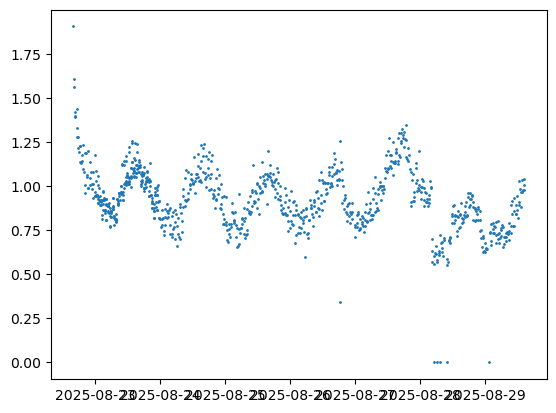

In [81]:
fig, ax = plt.subplots()

dcdt_median = ds['dcdt(HM)'].median(dim='MC').values
time = ds['time'].values

# print(ds['dcdt(HM)'].median(dim='MC').values)
ax.scatter(time, dcdt_median, label='median', s=1)

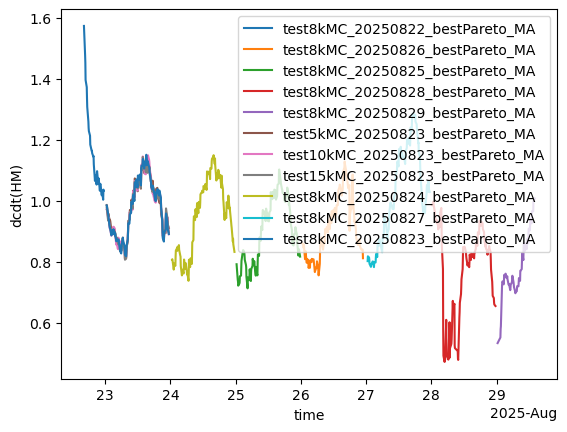

In [27]:
fig, ax = plt.subplots()
for file in files:
    ds = xr.open_dataset(file)
    # print(ds)
    
    # ds['dcdt(HM)'].median(dim='MC').plot(label=file.stem, ax=ax)
    #moving average
    ds['dcdt(HM)'].rolling(time=5, center=True).mean().median(dim='MC').plot(label=file.stem+'_MA', ax=ax)

    # q16 = ds['dcdt(HM)'].quantile(0.16, dim='MC')
    # q84 = ds['dcdt(HM)'].quantile(0.84, dim='MC')
    # ax.fill_between(ds['time'], q16, q84, alpha=0.3)

    ax.legend()
    # break

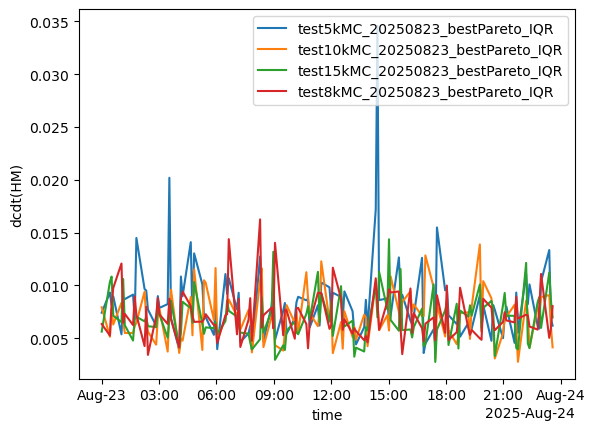

In [18]:
fig, ax = plt.subplots()

for file in files:
    ds = xr.open_dataset(file)
    # print(ds)
    
    # ds['dcdt(HM)'].median(dim='MC').plot(label=file.stem, ax=ax)
    #moving average
    # ds['dcdt(HM)'].rolling(time=5, center=True).mean().median(dim='MC').plot(label=file.stem+'_MA', ax=ax)

    q16 = ds['dcdt(HM)'].quantile(0.16, dim='MC')
    q84 = ds['dcdt(HM)'].quantile(0.84, dim='MC')
    diff = q84 - q16
    diff.plot(label=file.stem+'_IQR', ax=ax)
    # ax.fill_between(ds['time'], q16, q84, alpha=0.3)

    ax.legend()
    # break